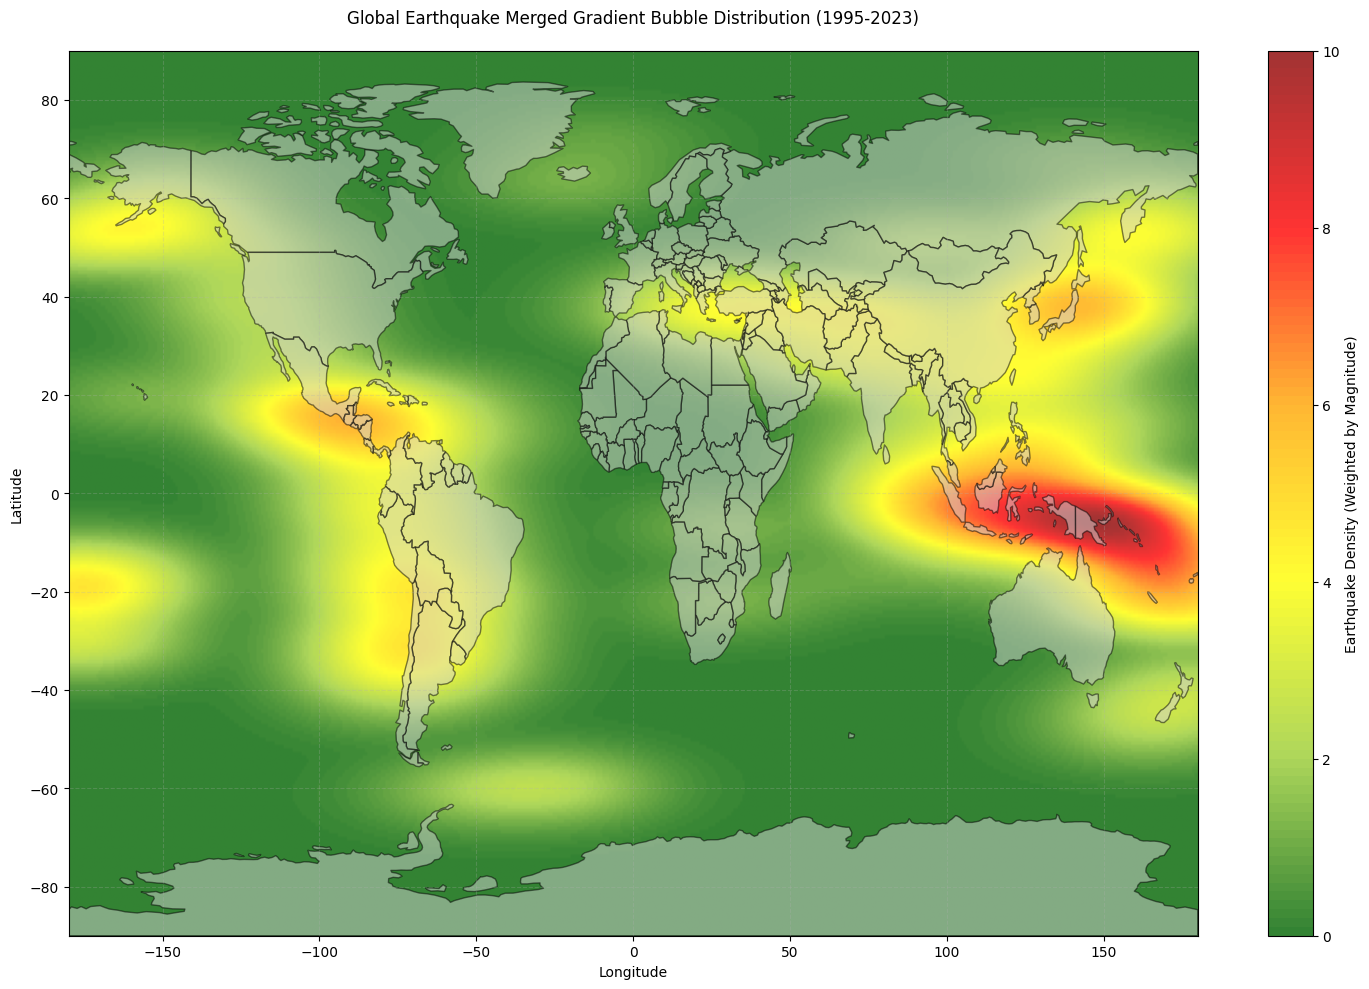

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from scipy.stats import gaussian_kde

# Load your data into a pandas DataFrame
df = pd.read_csv("Datasets/3_earthquake_1995-2023.csv")

# Load world map directly from Natural Earth Data URL
world_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(world_url)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# Create a grid of points
x_grid = np.linspace(-180, 180, 500)
y_grid = np.linspace(-90, 90, 250)
xx, yy = np.meshgrid(x_grid, y_grid)

# Calculate the density with weighted magnitudes
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([df['longitude'], df['latitude']])
weights = df['magnitude']**2  # Square the magnitudes to emphasize stronger earthquakes

# Create kernel density estimate with adjusted bandwidth
kernel = gaussian_kde(values, weights=weights, bw_method=0.15)  # Reduced bandwidth for sharper contrast
z = np.reshape(kernel(positions).T, xx.shape)

# Apply non-linear normalization to enhance contrast
z_normalized = np.power(z / z.max(), 0.5) * 10  # Adjusted power for better visualization

# Create custom colormap for better visibility
from matplotlib.colors import LinearSegmentedColormap
colors = ['darkgreen', 'yellowgreen', 'yellow', 'orange', 'red', 'darkred']
n_bins = 100
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Plot the density as a merged gradient bubble map
im = ax.imshow(
    z_normalized,
    extent=[-180, 180, -90, 90],
    origin='lower',
    cmap=custom_cmap,
    alpha=0.8,
    aspect='auto'
)

# Add colorbar to show density levels
plt.colorbar(im, ax=ax, label='Earthquake Density (Weighted by Magnitude)')

# Customize the plot
plt.title('Global Earthquake Merged Gradient Bubble Distribution (1995-2023)', pad=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set map bounds
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.25)

# Adjust layout
plt.tight_layout()

plt.show()